# Manhattan Plot

In [3]:
!pip3 install matplotlib seaborn pandas

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
# Loading the sample data
data = pd.read_csv("manhattan_plot_sample.csv")
print(data.head())


  Chromosome  Position       p-value
0       chr1  66682867  2.479051e-10
1       chr1  57882282  5.787247e-09
2       chr1  14315092  5.647430e-04
3       chr1  27735830  3.430292e-03
4       chr1  97319575  2.139593e-05


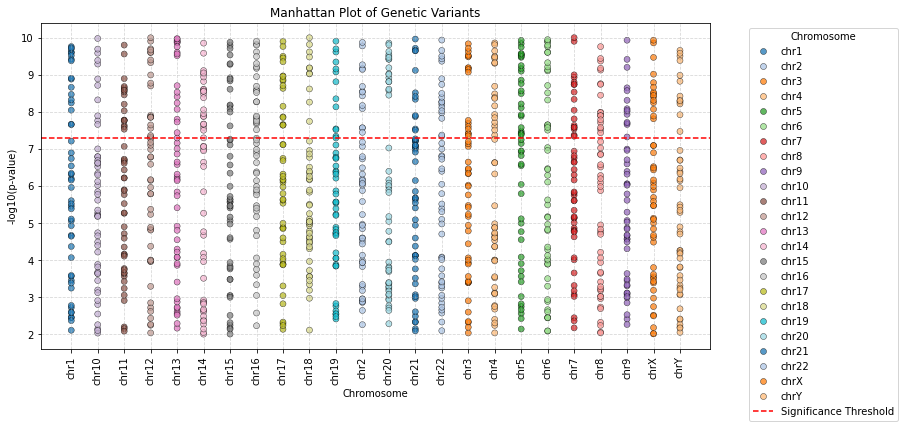

In [10]:
# Converting Chromosome labels to numeric values for plotting
chrom_order = {chrom: idx for idx, chrom in enumerate(sorted(data['Chromosome'].unique()))}
data['Chromosome_Num'] = data['Chromosome'].map(chrom_order)

# -log10 transformation of p-values
data['-log10(p-value)'] = -np.log10(data['p-value'])

# Setting up the Manhattan Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=data['Chromosome_Num'],
    y=data['-log10(p-value)'],
    hue=data['Chromosome'],  # Color by chromosome
    palette='tab20',
    edgecolor='black',
    alpha=0.75
)

# Highlighting significant variants (p < 5e-8) as red line
significance_threshold = -np.log10(5e-8)
plt.axhline(y=significance_threshold, color='red', linestyle='dashed', label='Significance Threshold')

plt.xlabel("Chromosome")
plt.ylabel("-log10(p-value)")
plt.title("Manhattan Plot of Genetic Variants")
plt.xticks(ticks=range(len(chrom_order)), labels=chrom_order.keys(), rotation=90)
plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()